In [104]:
# install.packages("magrittr")
# install.packages("tidytext")
# install.packages("ggplot2")
# install.packages("tm")
# install.packages("topicmodels")

library(purrr)
library(magrittr)
library(tidyr)
library(tidytext)
library(dplyr)
library(stringr)
library(ggplot2)
library(tm)
library(topicmodels)

Installing package into 'C:/Users/Sam/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependency 'modeltools'



package 'modeltools' successfully unpacked and MD5 sums checked
package 'topicmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sam\AppData\Local\Temp\RtmpMni5xw\downloaded_packages


In [55]:
library = "C:\\Users\\liblabs-user\\Desktop\\song-authorship\\data"
laptop = "not yet"
desktop = "C:\\Users\\Sam\\Desktop\\song authorship\\data"

In [56]:
df <- read.csv(
    paste(desktop, "\\Billboard_2017.csv", sep = ""),
    encoding = "UTF-8",
    stringsAsFactors = FALSE)

\# of songs word appears in vs # of appearances  (song coverage)
Punctuation, etc in cleaning


To-Do list:
Charlie:
- Transition to R
- Log-odds with song counts instead of word counts **done**
- Sentiment analysis  (see Drobinson)
- Latent Dirichlet
- Surprise me?
- N-grams
- Refer to 7/20 notes


#### Personal notes

- `str_detect`
 - checks whether a token is in the string
 
 
- `str_replace_all(word, regex to replace, token to replace with)`
 - equiv to re.sub
 
 
- `unnest_wokens(word, text)`
 - word: output column name
 - text: input column that the text comes from
 
 
- `spread(key, value)`
 - takes key, all possible values and creates columns out of the values.
 - nice function

In [5]:
str_replace_all("wowzers", ".+", "w")

[1] "w"

In [6]:
!str_detect("hello there", "^")

[1] FALSE

In [59]:
reg <- "([^A-Za-z\\d#@']|'(?![A-Za-z\\d#@]))"

df_words <- df %>%
    unnest_tokens(word, Lyrics, token = "regex", pattern = reg, collapse = TRUE) %>%
    filter(!word %in% stop_words$word, 
           str_detect(word, "[a-z]"))

unique_df_words <- unique(df_words)

## Log-Odds

In [61]:
ratios <- unique_df_words %>%
    count(word, Songwriter) %>%
    filter(sum(n) > 1) %>%
    spread(Songwriter, n, fill = 0) %>%
    ungroup() %>% #what is this used for?
    mutate_each(funs((. + 1) / sum(. + 1)), -word) %>%
    mutate(logratio = log2(True / False)) %>%
    arrange(desc(logratio))

`mutate_each()` is deprecated.
Use `mutate_all()`, `mutate_at()` or `mutate_if()` instead.
To map `funs` over a selection of variables, use `mutate_at()`


In [62]:
ratios

word,False,True,logratio
phone,0.0001275022,0.0010864504,3.091028
changed,0.0001275022,0.0006208288,2.283673
graduated,0.0001275022,0.0006208288,2.283673
hah,0.0001275022,0.0006208288,2.283673
lives,0.0001275022,0.0006208288,2.283673
one's,0.0001275022,0.0006208288,2.283673
respect,0.0001275022,0.0006208288,2.283673
shooters,0.0001275022,0.0006208288,2.283673
smoking,0.0001275022,0.0006208288,2.283673
strip,0.0001275022,0.0006208288,2.283673


More positive ratios indicate the word appears in many more songs with songwriters than in songs without songwriters

## Sentiment Analysis

## Latent Dirichlet Allocation

In [98]:
head(df_words)

Artists,Name,Rank,Date,Genre,Writing.Credits,Songwriter,word
21 Savage,Bank Account,48,7-Jul-17,"Memes , Epic Records , Trap , Rap",Metro Boomin & 21 Savage,True,bank
21 Savage,Bank Account,48,7-Jul-17,"Memes , Epic Records , Trap , Rap",Metro Boomin & 21 Savage,True,account
21 Savage,Bank Account,48,7-Jul-17,"Memes , Epic Records , Trap , Rap",Metro Boomin & 21 Savage,True,buy
21 Savage,Bank Account,48,7-Jul-17,"Memes , Epic Records , Trap , Rap",Metro Boomin & 21 Savage,True,car
21 Savage,Bank Account,48,7-Jul-17,"Memes , Epic Records , Trap , Rap",Metro Boomin & 21 Savage,True,bitch
21 Savage,Bank Account,48,7-Jul-17,"Memes , Epic Records , Trap , Rap",Metro Boomin & 21 Savage,True,real


In [105]:
word_counts <- df_words %>%
    count(Name, word, sort = TRUE) %>%
    ungroup() %>% # do we need this?
    cast_dtm(Name, word, n)

Warning message:
"Trying to compute distinct() for variables not found in the data:
- `row_col`, `column_col`
This is an error, but only a warning is raised for compatibility reasons.
The operation will return the input unchanged."

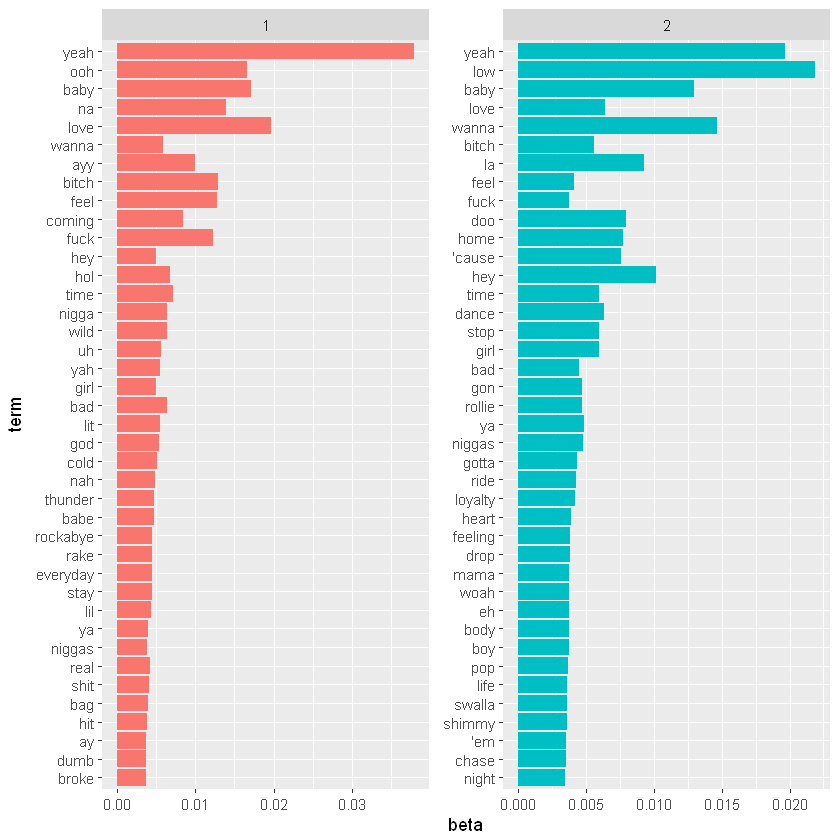

In [142]:
# create LDA object
songs_lda <- LDA(word_counts, k = 2, control = list(seed = 0))
topics <- tidy(songs_lda, matrix = "beta")
    
# visualize
ap_top_terms <- topics %>%
    group_by(topic) %>%
    top_n(40, beta) %>%
    ungroup() %>%
    arrange(topic, -beta)
    
ap_top_terms %>%
    mutate(term = reorder(term, beta)) %>%
    ggplot(aes(term, beta, fill = factor(topic))) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~ topic, scales = "free") + # partition by topic
    coord_flip()